In [47]:
import h5py
import numpy as np

with h5py.File("food_c101_n1000_r384x384x3.h5", "r") as f:
    images = f["images"][:]            # images (1000, 384, 384, 3)
    category = f["category"][:]          # numeric labels (1000,)
    category_names = f["category_names"][:]  # class names (101,)

print("Images shape:", X.shape)
print("Labels shape:", y.shape)
print("Class names shape:", category_names.shape)


Images shape: (1000, 384, 384, 3)
Labels shape: (1000, 101)
Class names shape: (101,)


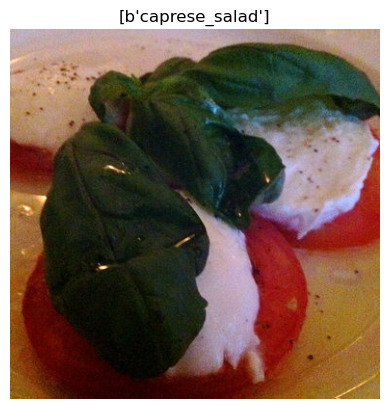

In [48]:
import matplotlib.pyplot as plt

idx = 0
plt.imshow(images[idx])

# just index directly, no .decode()
plt.title(category_names[category[idx]])
plt.axis("off")
plt.show()


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    images, category, test_size=0.2, random_state=42, stratify=category
)


In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(384,384,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(category_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 382, 382, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 191, 191, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 189, 189, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 94, 94, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 92, 92, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 270848)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    34,668,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,774,949 (132.66 MB)

 Trainable params: 34,774,949 (132.66 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [52]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=32
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0088 - loss: 95.6395 - val_accuracy: 0.0150 - val_loss: 4.6140
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0575 - loss: 4.5319 - val_accuracy: 0.0350 - val_loss: 4.5881
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3438 - loss: 3.6232 - val_accuracy: 0.0100 - val_loss: 4.9665
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7600 - loss: 1.3911 - val_accuracy: 0.0050 - val_loss: 7.9794
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9325 - loss: 0.4103 - val_accuracy: 0.0100 - val_loss: 10.6819
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9787 - loss: 0.1595 - val_accuracy: 0.0100 - val_loss: 12.5510
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9862 - loss: 0.1302 - val_accuracy: 0.0100 - val_loss: 12.1083
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9862 - loss: 0.1154 - val_accuracy: 0.0050 - val_l

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_acc)
###overfitted

7/7 - 1s - 202ms/step - accuracy: 0.0100 - loss: 13.9026
Test accuracy: 0.009999999776482582
